# representative_elementary_volume

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.metrics.representative_elementary_volume))

---
 ## Documentation for ``representative_elementary_volume``
 ---
**<span style="color:purple">representative&#95;elementary&#95;volume</span>_(im, npoints=1000)_**


Calculates the porosity of the image as a function subdomain size.  This
function extracts a specified number of subdomains of random size, then
finds their porosity.


#### Parameters
* im : <b><i>ND-array</i></b>  The image of the porous material
* npoints : <b><i>int</i></b>  The number of randomly located and sized boxes to sample.  The default
	is 1000.

#### Returns
* result : <b><i>named_tuple</i></b>  A tuple containing the *volume* and *porosity* of each subdomain
	tested in arrays ``npoints`` long.  They can be accessed as
	attributes of the tuple.  They can be conveniently plotted
	by passing the tuple to matplotlib's ``plot`` function using the
	\* notation: ``plt.plot(*result, 'b.')``.  The resulting plot is
	similar to the sketch given by Bachmat and Bear [1]

#### Notes
This function is frustratingly slow.  Profiling indicates that all the time
is spent on scipy's ``sum`` function which is needed to sum the number of
void voxels (1's) in each subdomain.

Also, this function is a prime target for parallelization since the
``npoints`` are calculated independenlty.

#### References
[1] Bachmat and Bear. On the Concept and Size of a Representative
Elementary Volume (Rev), Advances in Transport Phenomena in Porous Media
(1987)
---

### Import packages

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

### Create image:

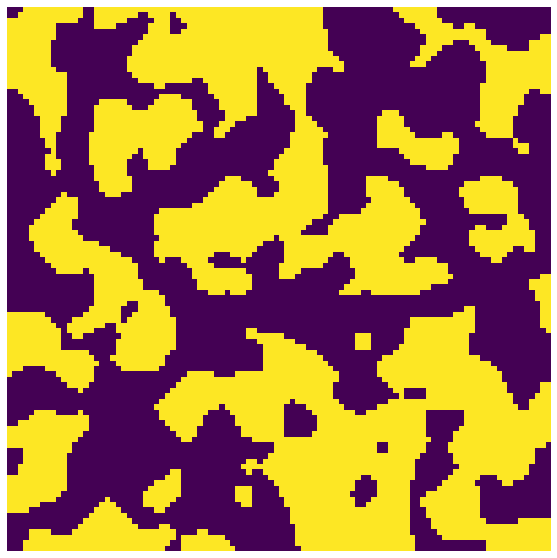

In [3]:
skel = ps.generators.blobs(shape=[100, 100])
im = ps.filters.prune_branches(skel)

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values:
npoints = 1000

### Apply metric function:

Output is a tuple with elements volume and porosity.

### default

In [4]:
profile = ps.metrics.representative_elementary_volume(im =  im, npoints= npoints)

  0%|          | 0/765 [00:00<?, ?it/s]

Plot results:

Text(0.5, 1.0, 'Porosity')

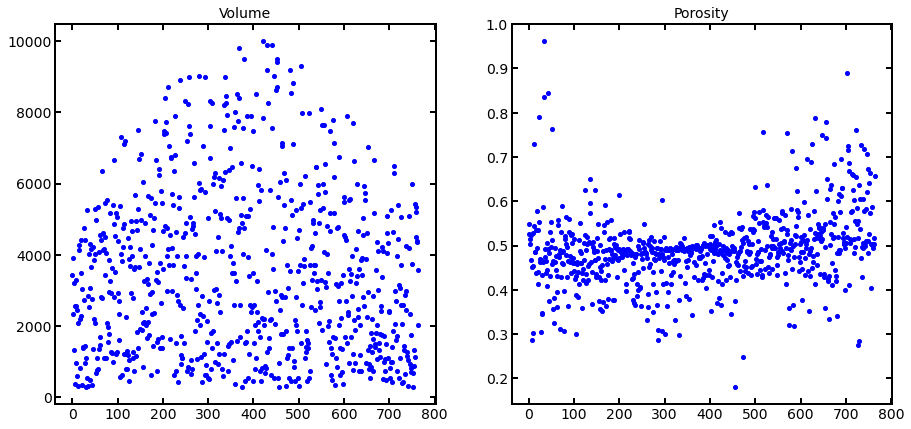

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(profile.volume, "b.")
ax[1].plot(profile.porosity, "b.")
ax[0].set_title("Volume")
ax[1].set_title("Porosity")

### npoints

In [6]:
profile = ps.metrics.representative_elementary_volume(im=im, npoints=100)

  0%|          | 0/98 [00:00<?, ?it/s]

Plot results:

Text(0.5, 1.0, 'Porosity')

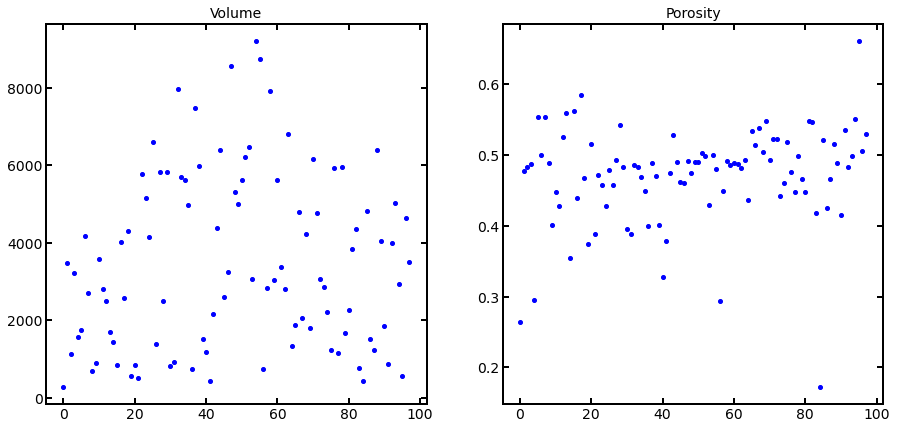

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(profile.volume, "b.")
ax[1].plot(profile.porosity, "b.")
ax[0].set_title("Volume")
ax[1].set_title("Porosity")